# Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
download("stopwords")
download("wordnet")
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lizhiyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lizhiyi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load the data

In [2]:
data = pd.read_json("recipes.json", lines=True)
# Read the file as a json object per line

In [3]:
data.head(5)

,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an..."
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1617 non-null   object
 1   url          1617 non-null   object
 2   Description  1429 non-null   object
 3   Author       1611 non-null   object
 4   Ingredients  1617 non-null   object
 5   Method       1617 non-null   object
dtypes: object(6)
memory usage: 75.9+ KB


In [6]:
data["Ingredients"].head(5)

0    [2 tbsp olive oil, knob butter, 1 onion, finel...
1    [175g butter, chopped, 200g dark muscovado sug...
2    [200g dark muscovado sugar, 175g butter, chopp...
3    [500g strong white flour, plus extra for dusti...
4    [280g self-raising flour, 175g golden caster s...
Name: Ingredients, dtype: object

# Clean the data

In [8]:
# map function is used to map values of series according to an input mapping or function
# re.sub is used to replace the non-chracter strings with empty space
data["Ingredients"] = data["Ingredients"].map(
    lambda x: re.sub(r'[^a-zA-Z ] ', ' ', str(x)))

In [9]:
# drop the NULL values from ingredients columns
data = data.dropna(subset=["Ingredients"])

In [10]:
# use the English stopwords from nltk and add some extra words 
stop = stopwords.words("english") + ["tsp", "tbsp", "finely", "extra", "chopped"]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Remove Encoding

In [11]:
def remove_encoding_word(word):
    word = str(word)
    word = word.encode("ASCII", "ignore").decode("ASCII")
    return word

In [12]:
def remove_encoding_text(text):
    text = str(text)
    text = " ".join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

# Define Lemmatizing

In [13]:
# remove the encoding and stop wrods from the Ingredients column
data["Ingredients"] = data["Ingredients"].apply(remove_encoding_text)

In [14]:
text = " ".join(words for words in data["Ingredients"])
len(text)

408959

In [17]:
lemma = WordNetLemmatizer().lemmatize

In [18]:
lemma("leaves")

'leaf'

# Fit and transform text

In [19]:
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens 

In [21]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2, 2)),
                            stop_words = stop, strip_accents = "unicode")

In [22]:
tdm = vectorizer.fit_transform(data["Ingredients"])

/Users/lizhiyi/opt/miniconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn(


In [27]:
vectorizer.vocabulary_.items();

# Get word frequencies and Create Wordcloud

In [28]:
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [29]:
tfidf_weights[:10]

[('olive onion', 5.824471514115579),
 ('onion sausagemeat', 0.2583004743669975),
 ('sausagemeat skinned', 0.2583004743669975),
 ('skinned zest', 0.2583004743669975),
 ('zest fresh', 0.5822854727031399),
 ('fresh white', 4.835339428289038),
 ('white dried', 0.6984758317551231),
 ('dried apricot', 6.028291416266405),
 ('apricot chestnut', 0.2583004743669975),
 ('chestnut canned', 0.2583004743669975)]

In [30]:
w = WordCloud(width=1500, height=1200, mode="RGBA", 
              background_color = "white", max_words=2000).fit_words(dict(tfidf_weights))

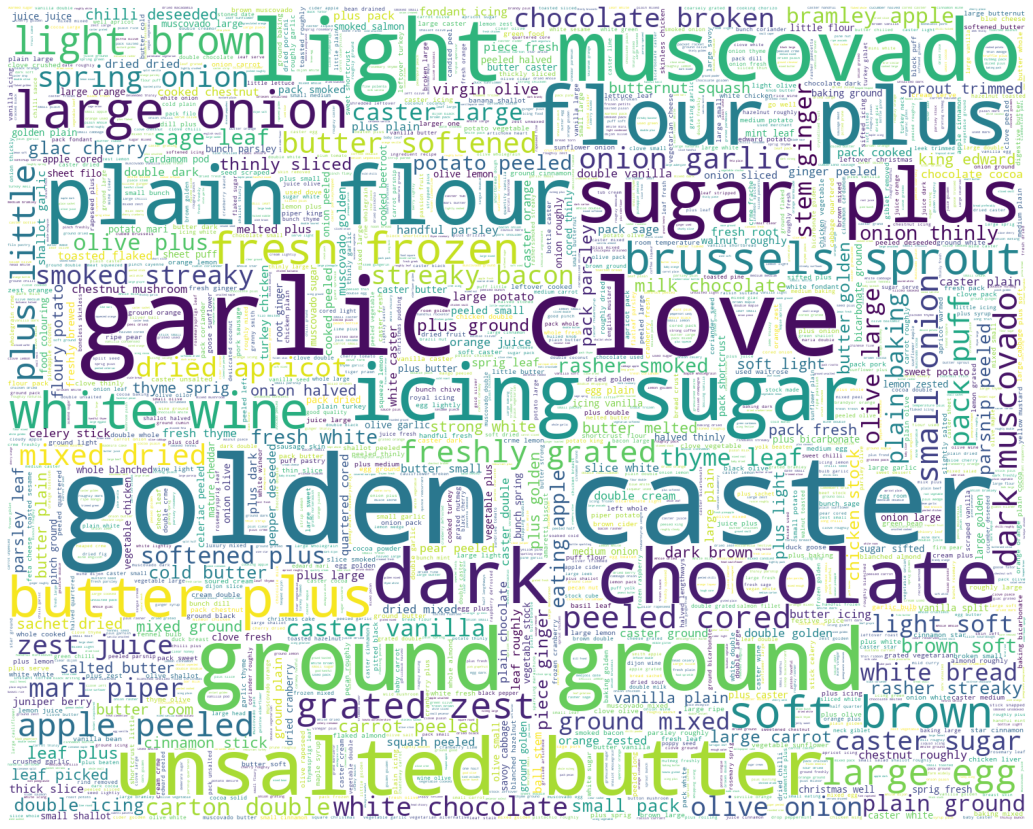

In [32]:
plt.figure(figsize=(20, 15))
plt.imshow(w)
plt.axis("off")
plt.savefig("recipes_wordcloud.png")